# 主成分分析法
$\quad$我们在介绍[线性变换](《线性代数及其应用》笔记08.矩阵的几何解释-线性变换.ipynb)的时候提及过，矩阵相乘是可以对数据做降维的。pca的目的就是对数据做一次投影，将高维数据投影至低维，同时保持数据集中的对方差贡献最大的特征。
## 1.协方差矩阵
$\quad$我们将待处理的数据写成一个矩阵，称之为**观测矩阵**，矩阵中每一行代表一个属性，每一列代表一个观测样本。例如一批数据是关于$N$个大学生的身高和体重的，$\mathbf{X}_{i}$代表观测向量。那么观测矩阵的形式为：

<img src="./_image/20_1.png" width="100" height="50" />  

可以看到每个样本均可看成是一个向量$\mathbf{X}_{i}$，$\mathbf{X}_{i}=(x_1,…,x_N)$。  
$\quad$令$[\mathbf{X}_{1} \cdots \mathbf{X}_{N}]$是一个$p\times N$观测矩阵，观测向量的样本均值$M$为：

$$\mathbf{M}=\frac{1}{N}(\mathbf{X}_{1}+\cdots+\mathbf{X}_{N})$$

样本均值是所有数据点的”中心“。对$k=1,\cdots,N$，令：

$$
B=\begin{bmatrix}\mathbf{X}_{k}-\mathbf{M} & \cdots & \mathbf{X}_{N}-\mathbf{M}\end{bmatrix}=
\begin{bmatrix}\hat{\mathbf{X}}_{1} & \cdots & \hat{\mathbf{X}}_{N}\end{bmatrix}
$$

$B$具有零样本均值，这样的$B$称之为**平均偏差形式**。举例：  

<img src="./_image/20_4.png" width="400" height="350" />  

$\quad$**(样本)协方差矩阵**是一个$p\times p$矩阵$S$，其定义为：

$$S=\frac{1}{N-1}BB^{T}$$

$\quad$其中$S$的对角线元素$s_{ii}$称为$x_i$的**方差**，是用于度量观测矩阵中第$i$种属性$x_i$的分散性。$S$的非对角线元素$s_{ij}$称为$x_i$和$x_j$的**协方差**，协方差描述的是$x_i$和$x_j$同向趋势，如果是同向变化，协方差为正；如果是反向变化，协方差为负。当协方差衡量的是同一属性时，协方差就成了方差。  
$\quad$数据的总方差是指$S$上对角线方差的总和，我们称一个矩阵对角线元素之和为**矩阵的迹**，记作$tr(S)$。    
## 2.pca算法流程
$\quad$算法流程：
1. 对所有样本进行中心化，并计算协方差矩阵；  
2. 对协方差矩阵进行特征值分解；  
3. 取前d大的特征值对应的特征向量（主成分）$\{\mathbf{u}_{1},\cdots,\mathbf{u}_{d}\}$构成一个投影矩阵$U$；  
4. 计算$Y=U^{T}X$完成降维。  

pca的目标是对数据做降维，该数据变换需满足以下性质：
1. 得到的新属性，两两之间的协方差为0；
2. 第一个属性捕获尽量多的数据方差，在满足正交性的前提下，每个后继属性捕获尽可能多的剩余方差。  

为啥要捕获尽量多的数据方差呢？因为一组数据中某一个属性如果方差为0，表明该属性没有研究价值；且如果变换后的属性方差尽量大，说明属性本身的蕴含的信息减少的不多。  

<img src="./_image/20_5.png" width="400" height="350" />  

## 3.pca算法证明
$\quad$我们来推导为啥计算协方差矩阵的特征向量与特征值就可以符合我们所说的性质。要对数据做投影，要找到一组基，基与原数据矩阵作一次矩阵相乘即可完成投影，这组基假定为$U=\begin{bmatrix}\mathbf{u}_{1} & \cdots & \mathbf{u}_{d}\end{bmatrix}$，是一个单位正交基，我们所求的即为$U$，下面的证明将会说明$U$如何得到：
<img src="./_image/20_2.png" width="450" height="400" />  
<img src="./_image/20_3.png" width="450" height="400" />  
可以惊奇的发现，这不就是特征值和特征向量吗？因此，我们只需要求出$X$的协方差矩阵的特征值和特征向量，接着对特征值排序，取前$d$个特征向量（主成分）构成$U=\begin{bmatrix}\mathbf{u}_{1} & \cdots & \mathbf{u}_{d}\end{bmatrix}$即可完成pca。  
## 4.pca与svd
$\quad$设$X$为具有平均偏差形式的矩阵。pca的一个关键步骤就是求出协方差矩阵$\frac{1}{N-1}XX^{T}$的特征值和特征向量。我们联系前面所学的[奇异值分解](《线性代数及其应用》笔记18.矩阵分解-奇异值分解.ipynb)，对于一个矩阵$X$，可以分解为:

$$X=U\varSigma V^{T}$$

代入计算有：

$$XX^{T}=(U\varSigma V^{T})(U\varSigma V^{T})^{T}=U\varSigma^{2}U^{T}$$

结合对角化的知识，我们可以知道$U$的列向量是$XX^{T}$的特征向量，$\varSigma^{2}$是$XX^{T}$的非零特征值组成的矩阵。最后再结合回主成分分析法，协方差矩阵$\frac{1}{N-1}XX^{T}$的特征值和特征向量（主成分）其实为$X$的奇异值的平方、左奇异向量。   
$\quad$故对一份观测矩阵进行pca降维，中心化后为$X$，对$X$进行奇异值分解$X=U\varSigma V^{T}$，$U$即为主成分，比较奇异值的平方的大小来选取主成分即可完成算法。

In [17]:
import numpy as np
import matplotlib.pyplot as plt

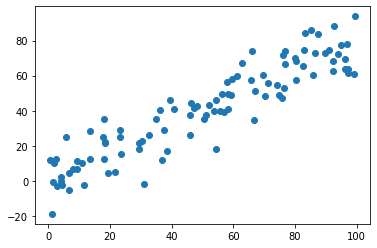

In [18]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)
#有线性关系，降维效果明显
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### 1.零均值化(中心化)
每个样本均可看成是一个向量$\mathbf{X}_{i}$，$\mathbf{X}_{i}=(x_1,…,x_N)$。
$\quad$令$[\mathbf{X}_{1} \cdots \mathbf{X}_{N}]$是一个$p\times N$观测矩阵，观测向量的样本均值$M$为：

$$\mathbf{M}=\frac{1}{N}(\mathbf{X}_{1}+\cdots+\mathbf{X}_{N})$$

样本均值是所有数据点的”中心“。对$k=1,\cdots,N$，令：

$$
B=\begin{bmatrix}\mathbf{X}_{k}-\mathbf{M} & \cdots & \mathbf{X}_{N}-\mathbf{M}\end{bmatrix}=
\begin{bmatrix}\hat{\mathbf{X}}_{1} & \cdots & \hat{\mathbf{X}}_{N}\end{bmatrix}
$$

demean。每个样本的每个特征减去这个特征的均值
在demean后，样本的每个特征的mean都为0
#### 2.求协方差
1. numpy.cov
2. X的协方差矩阵: $$\frac{1}{N-1}X X^{T}$$

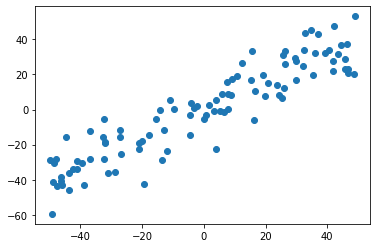

In [19]:
#np.mean(X,axis=0)，第一维方向的mean{对两列计算均值，剩下第一位}
def demean(X):
    return X - np.mean(X, axis=0)


X_demean = demean(X)  # 求X中心化
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()  #可以看见，只是坐标轴变了

In [20]:
# 求协方差矩阵
C = np.dot(X.T, X) / (X.shape[0] - 1)  # np.cov(X_demean)

#### 3.(1)求协方差特征值和特征矩阵
#### 3.(2)第二种方式是直接对中心化X进行奇异值分解

In [21]:
#(1)
eigenvalues, eigenvectors = np.linalg.eig(C)
t = np.vstack((eigenvalues, eigenvectors))
t = t[:, np.argsort(-t[0, :])]
t = np.squeeze(t)
eigenvectors = t[1:, :]
X_pac_w = np.array(list(map(lambda x: math.sqrt(x), np.array(t[:1])[0])))
X_pca = np.dot(X, eigenvectors)

NameError: name 'math' is not defined

In [ ]:
#(2)
import math

n, m = X_demean.shape
U, Sigma, Vh = np.linalg.svd(X_demean,
                             full_matrices=False,
                             compute_uv=True)
X_svd = np.dot(U, np.diag(Sigma))

In [22]:
# coding: utf-8

'''
特征向量分解实现PCA算法
如果特征值出现复数该算法会失效，这就引入了SVD，奇异值分解，
奇异值类比于特征值，但是奇异值一定是非负实数，不存在之前的情况
'''

import numpy as np


class PCA(object):
    m = 0
    n = 0
    #降维所需的基向量
    base_vectors = None

    #均值归一化
    def mean_normalization(self, X):
        for j in range(self.n):
            me = np.mean(X[:, j])
            X[:, j] = X[:, j] - me
        return X

    #r为降低到的维数
    def fit(self, X, r):
        self.m = X.shape[0]
        self.n = X.shape[1]
        #均值归一化
        X = self.mean_normalization(X)
        Xt = X.T
        #协方差矩阵
        c = (1 / self.m) * Xt.dot(X)
        #求解协方差矩阵的特征向量和特征值
        eigenvalue, featurevector = np.linalg.eig(c)
        #对特征值索引排序 从大到小
        aso = np.argsort(eigenvalue)
        indexs = aso[::-1]
        eigenvalue_sum = np.sum(eigenvalue)
        self.base_vectors = []
        for i in range(r):
            self.base_vectors.append(featurevector[:, indexs[i]])  #取前r个特征值大的特征向量作为基向量
        self.base_vectors = np.array(self.base_vectors)
        return

    def transform(self, X):
        #r*n的P乘以n*m的矩阵转置后为m*r的矩阵
        return self.base_vectors.dot(X.T).T

    def fit_transform(self, X, r):
        self.fit(X, r)
        return self.transform(X)


pca = PCA()
X_transformed = pca.fit_transform(X_demean, r=1)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, X_transformed[0] * 2], [0, X_transformed[1] * 2], color='r')  #第一个主成分
plt.show()

TypeError: dot() missing 1 required positional argument: 'b'

[[0.76627752 0.64250973]]
(100, 2)


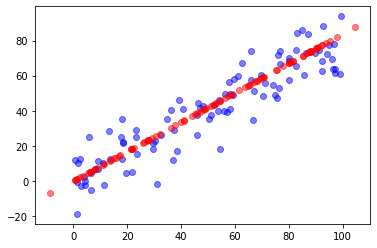

In [26]:
"""
1.用户传来获得前N个主成分的N值
2.demean(X)获得X_PCA
3.根据N值，empty一个n行，列数等于特征数的空数组
4.对于N值进行循环
    1.每轮循环随机一个搜索方向，作为起始搜索方向
    2.使用梯度上升搜索此时的PCA的第一主成分
       1.设置学习率，学习次数，极限大小
       2.每轮需要把w变成单位向量(让其只表示搜索方向)
       3.对目标函数求梯度上升，直到达到学习次数，学习空间小于极限值
       4.注：不能对数据进行归一化（已经demean过）
    3.把得到的主成分存在我们empty的数组的对应行
    4.计算新的X_pca
5.返回self
"""
import numpy as np


class PCA:
    def __init__(self, n_components):  #第一个组件
        self.n_components = n_components
        self.components_ = None

    def fit(self, X, eta=0.001, n_iters=1e4):
        def first_n_components(n, X, eta=0.001, n_iters=1e4, epsilon=1e-8):
            X_pca = X.copy()  # 以后的计算都是用X_pca
            X_pca = demean(X_pca)
            res = []  # 用来存前n个主成分的列表
            for i in range(n):
                initial_w = np.random.random(X_pca.shape[1])  # 随机初始化一个搜索点
                w = first_component(X_pca, initial_w, eta)
                res.append(w)  # 求出主成分对应的方向
                X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
            return res

        def f(X, w):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(X, w):  # △f
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def demean(X):
            return X - np.mean(X, axis=0)

        def diretion(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.001, n_iters=1e4, epsilon=1e-8):
            w = diretion(initial_w)
            # 如果我们不做diretion，理所应当需要eta很小，会使搜索次数变多
            cur_iter = 0
            while cur_iter < n_iters:
                gradient = df(X, w)
                last_w = w
                w = w + eta * gradient  # 梯度上升
                w = diretion(w)  # 注意1：应该让w成为一个表方向的单位向量
                if (abs(f(X, w) - f(X, last_w)) < epsilon):
                    break
                cur_iter += 1
            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i, :] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        return self

    def transform(self, X):  #对于用户的数据集，隐射到主成分分量中
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        assert X.shape[1] == self.components_.shape[0]

        return X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components


pca = PCA(n_components=1)
pca.fit(X)
print(pca.components_)  ##方向和我们相反
X_resuction = pca.transform(X)
X_restore = pca.inverse_transform(X_resuction)
print(X_restore.shape)
#绘制一下散点图
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)
plt.show()